# Render Contours

author = Caroline Magg <br>
date = 01 April 2020 <br>

___________________________________
history: <br>
2020-04-01 <br>

In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2
import pydicom
import vtk

In [6]:
%matplotlib inline

## Add path dependencies

In [7]:
# add KidsBrainProject main folder to paths
sys.path.append(os.path.abspath('../../'))
sys.path.append(os.path.abspath('../utils/'))

In [8]:
from utils_explore import read_structure,read_contour,read_contour_names,read_contour_row

In [9]:
# add path to data here
path_data = "../../Data/" 

In [10]:
idx = 1
folder_name = os.path.join(path_data, str(idx))
folder = os.listdir(folder_name)
folder

['CT',
 'RD.Jacks1IMPT.dcm',
 'RD.Jacks1IMPTb.dcm',
 'RS.Jacks1.dcm',
 'T1 +C 3-15-16',
 'T1 +C 3-23-16',
 'T1 +C 4-29-16',
 'T2 CISS 3-15-16',
 'T2 CUBE 4-29-16']

## Create Contour Information

In [11]:
path_contours = os.path.join(path_data, str(idx), 'RS.Jacks1.dcm')
df_contours = read_contour_names(path_contours)
#df_contours = df_contours.sort_values(by=['RoiNumber'])
len(df_contours)

number of ROIs 104


104

In [12]:
df_contours

,ID,RoiNumber,RoiName
0,0,29,Body
1,1,1,Brain
2,2,28,Brainstem
3,3,3,BrainstemCore
4,4,4,BrainstemSurf
5,5,2,BrainSupraTent
6,6,6,CochleaLt
7,7,7,CochleaRt
8,8,5,CTV
9,9,8,GTV


In [13]:
df_test = df_contours.iloc[0:2]
df_test

,ID,RoiNumber,RoiName
0,0,29,Body
1,1,1,Brain


In [14]:
contour = read_contour_row(path_contours, df_test)

number of ROIs 2
0 Body
number of contour 293
1 Brain
number of contour 177


In [15]:
len(contour)

127424

In [16]:
np.unique(contour[:,2])

array([ 55.5,  56.5,  57.5,  58.5,  59.5,  60.5,  61.5,  62.5,  63.5,
        64.5,  65.5,  66.5,  67.5,  68.5,  69.5,  70.5,  71.5,  72.5,
        73.5,  74.5,  75.5,  76.5,  77.5,  78.5,  79.5,  80.5,  81.5,
        82.5,  83.5,  84.5,  85.5,  86.5,  87.5,  88.5,  89.5,  90.5,
        91.5,  92.5,  93.5,  94.5,  95.5,  96.5,  97.5,  98.5,  99.5,
       100.5, 101.5, 102.5, 103.5, 104.5, 105.5, 106.5, 107.5, 108.5,
       109.5, 110.5, 111.5, 112.5, 113.5, 114.5, 115.5, 116.5, 117.5,
       118.5, 119.5, 120.5, 121.5, 122.5, 123.5, 124.5, 125.5, 126.5,
       127.5, 128.5, 129.5, 130.5, 131.5, 132.5, 133.5, 134.5, 135.5,
       136.5, 137.5, 138.5, 139.5, 140.5, 141.5, 142.5, 143.5, 144.5,
       145.5, 146.5, 147.5, 148.5, 149.5, 150.5, 151.5, 152.5, 153.5,
       154.5, 155.5, 156.5, 157.5, 158.5, 159.5, 160.5, 161.5, 162.5,
       163.5, 164.5, 165.5, 166.5, 167.5, 168.5, 169.5, 170.5, 171.5,
       172.5, 173.5, 174.5, 175.5, 176.5, 177.5, 178.5, 179.5, 180.5,
       181.5, 182.5,

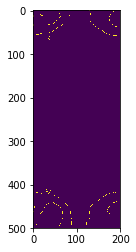

In [18]:
test = []
for i in range(len(contour)):
    if contour[i][2] == 203.5:
        test.append(contour[i])
test = np.array(test)
mask = np.zeros((500,200))
for i in range(len(test)):
    mask[int(test[i][0]),int(test[i][1])] = 1
plt.imshow(mask)

In [19]:
test

array([[-13.18, -78.57, 203.5 ],
       [-11.23, -78.81, 203.5 ],
       [ -9.28, -78.8 , 203.5 ],
       ...,
       [-21.  ,   9.32, 203.5 ],
       [-19.04,   8.61, 203.5 ],
       [-17.51,   8.1 , 203.5 ]])

In [20]:
actors = []
for i in range(len(df_test)): 
    # create contour coordinates
    df_t = df_test[i:i+1]
    contour = read_contour_row(path_contours, df_t)
    # save points as vtkPolyData
    points = vtk.vtkPoints()
    for idx, point in enumerate(contour):
        points.InsertPoint(idx, point[0], point[1], point[2])
    pointCloud = vtk.vtkPolyData()
    pointCloud.SetPoints(points)
    # Create triangulation
    delaunay = vtk.vtkDelaunay2D() # Vtk.vtkDelaunay3D() is not working
    delaunay.SetInputData(pointCloud)
    delaunay.SetTolerance(0.05)
    delaunay.SetAlpha(0.2)
    #delaunay.BoundingTriangulationOff()
    delaunay.Update()
    # extracts outer (polygonal) surface
    surfaceFilter = vtk.vtkDataSetSurfaceFilter()
    surfaceFilter.SetInputConnection(delaunay.GetOutputPort())
    surfaceFilter.Update()
    # Mapper
    mapper = vtk.vtkPolyDataMapper()
    mapper.SetInputData(surfaceFilter.GetOutput())
    mapper.Update()

    # Actor
    actor = vtk.vtkActor()
    actor.SetMapper(mapper)
    actor.GetProperty().SetColor(i, 0, 0)
    actors.append(actor)

# Renderer
renderer = vtk.vtkRenderer()
for i in range(len(actors)):
    renderer.AddActor(actors[i])
renderer.SetBackground(.2, .3, .3)  #colour
renderer.ResetCamera()

# Render Window
renderWindow = vtk.vtkRenderWindow()
renderWindow.AddRenderer(renderer)

# Interactor
renderWindowInteractor = vtk.vtkRenderWindowInteractor()
renderWindowInteractor.SetRenderWindow(renderWindow)

# Begin Interaction
renderWindow.Render()
renderWindowInteractor.Start()

number of ROIs 1
0 Body
number of contour 293
number of ROIs 1
1 Brain
number of contour 177


In [33]:
#contour = read_contour_row(path_contours, df_test)

In [24]:
len(contour)

2660

In [37]:
## Single contour

# save points as vtkPolyData
points = vtk.vtkPoints()
for idx, point in enumerate(contour):
    points.InsertPoint(idx, point[0], point[1], point[2])
pointCloud = vtk.vtkPolyData()
pointCloud.SetPoints(points)

# Create triangulation
delaunay = vtk.vtkDelaunay2D() # Vtk.vtkDelaunay3D() is not working
delaunay.SetInputData(pointCloud)
delaunay.SetTolerance(0.05)
delaunay.SetAlpha(0.2)
#delaunay.BoundingTriangulationOff()
delaunay.Update()

# extracts outer (polygonal) surface
surfaceFilter = vtk.vtkDataSetSurfaceFilter()
surfaceFilter.SetInputConnection(delaunay.GetOutputPort())
surfaceFilter.Update()

# Mapper
mapper = vtk.vtkPolyDataMapper()
mapper.SetInputData(surfaceFilter.GetOutput())
mapper.Update()

# Actor
actor = vtk.vtkActor()
actor.SetMapper(mapper)
actor.GetProperty().SetColor(1, 0, 0)

# Renderer
renderer = vtk.vtkRenderer()
renderer.AddActor(actor)
renderer.SetBackground(.2, .3, .3)  #colour
renderer.ResetCamera()

# Render Window
renderWindow = vtk.vtkRenderWindow()
renderWindow.AddRenderer(renderer)

# Interactor
renderWindowInteractor = vtk.vtkRenderWindowInteractor()
renderWindowInteractor.SetRenderWindow(renderWindow)

# Begin Interaction
renderWindow.Render()
renderWindowInteractor.Start()

In [76]:
# This example shows how to use Delaunay3D with alpha shapes.

import vtk

# The points to be triangulated are generated randomly in the unit
# cube located at the origin. The points are then associated with a
# vtkPolyData.
math = vtk.vtkMath()
points = vtk.vtkPoints()
for i in range(0, 25):
    points.InsertPoint(i, math.Random(0, 1), math.Random(0, 1),
                       math.Random(0, 1))

profile = vtk.vtkPolyData()
profile.SetPoints(points)

# Delaunay3D is used to triangulate the points. The Tolerance is the
# distance that nearly coincident points are merged
# together. (Delaunay does better if points are well spaced.) The
# alpha value is the radius of circumcircles, circumspheres. Any mesh
# entity whose circumcircle is smaller than this value is output.
delny = vtk.vtkDelaunay3D()
delny.SetInputData(profile)
delny.SetTolerance(0.01)
delny.SetAlpha(0.2)
delny.BoundingTriangulationOff()

# Shrink the result to help see it better.
shrink = vtk.vtkShrinkFilter()
shrink.SetInputConnection(delny.GetOutputPort())
shrink.SetShrinkFactor(0.9)

map = vtk.vtkDataSetMapper()
map.SetInputConnection(shrink.GetOutputPort())

triangulation = vtk.vtkActor()
triangulation.SetMapper(map)
triangulation.GetProperty().SetColor(1, 0, 0)

# Create graphics stuff
ren = vtk.vtkRenderer()
renWin = vtk.vtkRenderWindow()
renWin.AddRenderer(ren)
iren = vtk.vtkRenderWindowInteractor()
iren.SetRenderWindow(renWin)

# Add the actors to the renderer, set the background and size
ren.AddActor(triangulation)
ren.SetBackground(1, 1, 1)
renWin.SetSize(250, 250)
renWin.Render()

cam1 = ren.GetActiveCamera()
cam1.Zoom(1.5)

iren.Initialize()
renWin.Render()
iren.Start()